In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving iris (2).csv to iris (2).csv


In [3]:
df=pd.read_csv('iris (2).csv')

In [4]:
X = df.drop(columns=['species'])  # Features
y = df['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"Default model accuracy (n_estimators=10): {default_accuracy:.4f}")

Default model accuracy (n_estimators=10): 1.0000


In [7]:
n_estimators_range = range(10, 110, 10)
accuracy_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [8]:
best_accuracy = max(accuracy_scores)
best_n = n_estimators_range[accuracy_scores.index(best_accuracy)]
print(f"Best accuracy: {best_accuracy:.4f} with n_estimators={best_n}")

Best accuracy: 1.0000 with n_estimators=10


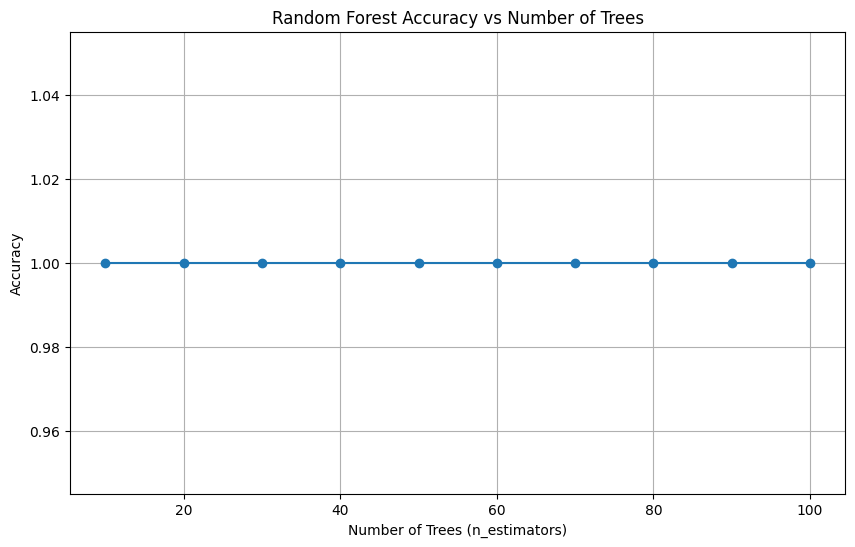

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()